In [25]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from src.classifier import train_models, remove_na_values
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import tqdm

## Feature selection from random forest

In [2]:
models = [RandomForestClassifier(random_state=0)]

df = remove_na_values(pd.read_csv('data/data.csv'))

In [3]:
df

,data_donor_email,session_id,version,event_time,A_KEY_TIME_MEAN,BOTH_DEV_C_COUNT,GAP_D1,GAP_D2,GAP_D3,GAP_D4,...,MULTIPLE_KEYS_UP,MULTIPLE_KEYS_UP_D1,MULTIPLE_KEYS_UP_D2,MULTIPLE_KEYS_UP_D3,MULTIPLE_KEYS_UP_D4,MULTIPLE_KEYS_UP_D5,MULTIPLE_KEYS_UP_D6,MULTIPLE_KEYS_UP_D7,MULTIPLE_KEYS_UP_D8,MULTIPLE_KEYS_UP_D9
6,007f18a9c4040ebd5addaa48ec64a3b5,1,7,2019-03-27 12:15:43.074,0.106,0.167,0.023,0.046,0.063,0.079,...,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0
7,007f18a9c4040ebd5addaa48ec64a3b5,1,8,2019-03-27 12:15:53.300,0.108,0.143,0.017,0.045,0.063,0.073,...,1.0,0.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0
8,007f18a9c4040ebd5addaa48ec64a3b5,1,9,2019-03-27 12:16:04.313,0.107,0.125,0.017,0.037,0.056,0.071,...,0.0,0.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0
9,007f18a9c4040ebd5addaa48ec64a3b5,1,10,2019-03-27 12:16:16.698,0.106,0.167,0.017,0.036,0.056,0.069,...,0.0,0.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0
10,007f18a9c4040ebd5addaa48ec64a3b5,1,11,2019-03-27 12:16:26.876,0.106,0.167,0.020,0.037,0.059,0.071,...,0.0,0.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21799,f690d1438368d0b3ea405a28e1aa0e2c,1,89,2019-10-30 15:40:33.240,0.099,0.750,0.035,0.060,0.072,0.082,...,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0
21800,f690d1438368d0b3ea405a28e1aa0e2c,1,90,2019-10-30 15:40:43.441,0.099,0.750,0.034,0.060,0.072,0.082,...,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0
21801,f690d1438368d0b3ea405a28e1aa0e2c,1,91,2019-10-30 15:40:54.138,0.099,0.755,0.034,0.060,0.072,0.082,...,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0
21802,f690d1438368d0b3ea405a28e1aa0e2c,1,92,2019-10-30 15:41:04.318,0.100,0.755,0.033,0.060,0.072,0.082,...,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0


In [4]:
results, models, (x_train, x_test, y_train, y_test) = train_models(models, df)
rf = models[0]
feature_importance = rf.feature_importances_

100%|██████████| 1/1 [00:08<00:00,  8.16s/it]


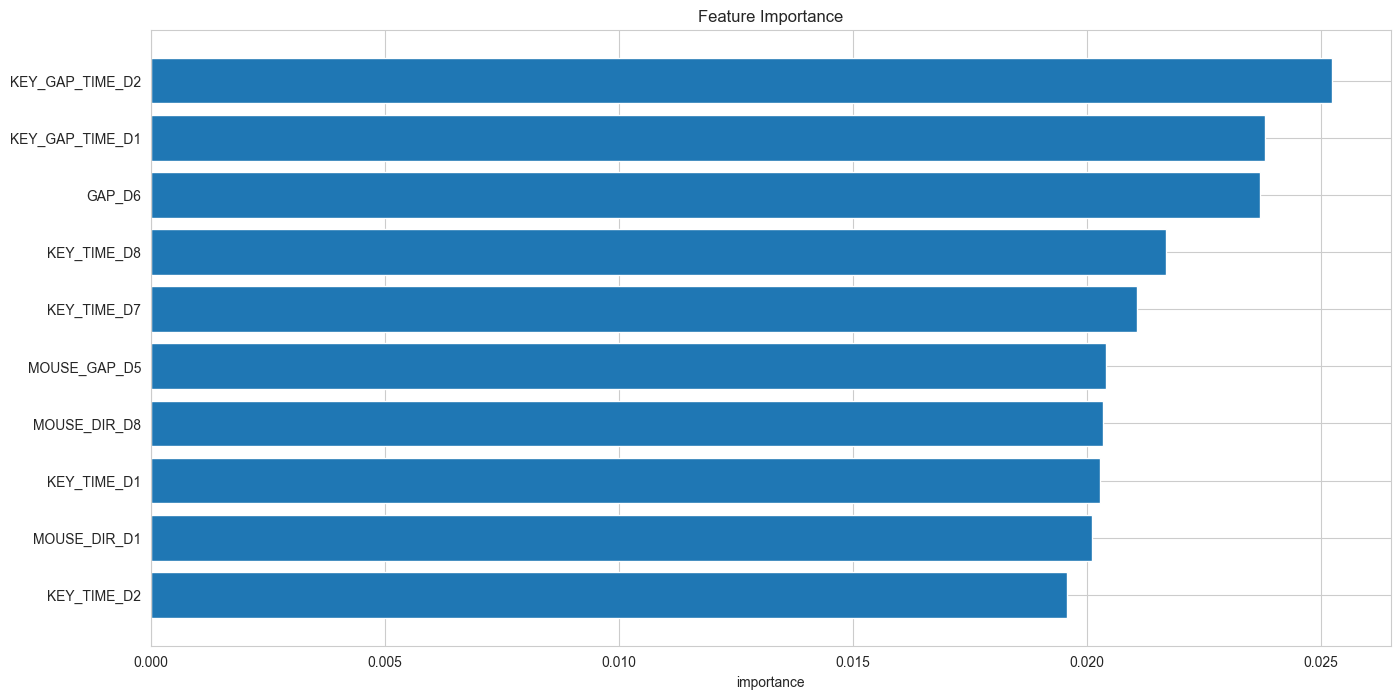

In [30]:
fi = pd.DataFrame({'name': df.columns[4:], 'importance': feature_importance})
fi.sort_values('importance', inplace=True)

n = 10
plt.figure(figsize=(16, 8))
plt.barh(fi.name[-n:], fi.importance[-n:])

plt.xlabel('importance')
plt.title('Feature Importance')
plt.show()

In [40]:
fi.to_csv('src/feature_selection_results/rf_importance.csv', index=False)

In [ ]:
feature_counts = [1, 2, 3, 5, 10, 20, 30, 40, 50]

sorted_feature_indexes = np.argsort(feature_importance)[::-1]

feature_sets = [sorted_feature_indexes[:feature_count] for feature_count in feature_counts]
rf_models = []
rf_results = []

for feature_set in tqdm(feature_sets):
    rf_model = RandomForestClassifier(random_state=0)
    rf_model.fit(x_train.iloc[:, feature_set], y_train)

    rf_models.append(rf_model)
    rf_results.append(accuracy_score(y_test, rf_model.predict(x_test.iloc[:, feature_set])))

In [57]:
pd.DataFrame({'n_features': feature_counts, 'accuracy': rf_results})

,n_features,accuracy
0,1,0.374448
1,2,0.753312
2,3,0.925817
3,5,0.978216
4,10,0.995290
5,20,0.997939
6,30,0.997939
7,40,0.997939
8,50,0.998528


## Feature groups

In [6]:
import re

column_names = df.columns[4:]

def get_group(s):
    pattern = re.compile(r"(.+?)_D[0-9]")
    search = pattern.search(s)
    if search is None:
        return s
    return search.group(1)

feature_groups = np.array([get_group(s) for s in column_names])

In [7]:
feature_groups_map = {s: np.where(feature_groups == s)[0] for s in np.unique(feature_groups)}

In [8]:
feature_group_importance = {s: 0 for s in np.unique(feature_groups)}

for group, importance in zip(feature_groups, feature_importance):
    feature_group_importance[group] += importance

feature_group_importance = np.array(list(feature_group_importance.items()))
feature_group_importance = feature_group_importance[feature_group_importance[:, 1].argsort()[::-1]]
feature_group_importance

array([['KEY_TIME', '0.16983675695730438'],
       ['KEY_GAP_TIME', '0.16158557005259372'],
       ['MOUSE_DIR', '0.15170645559405432'],
       ['GAP', '0.14939075121243864'],
       ['MOUSE_GAP', '0.11528465150917618'],
       ['MOUSE_DIST', '0.05841777870815998'],
       ['MOUSE_SPEED', '0.050503585952281355'],
       ['MULTIPLE_KEYS_DOWN', '0.04117445273040886'],
       ['MOUSE_DDIR', '0.026270502880517042'],
       ['A_KEY_TIME_MEAN', '0.019329601077549156'],
       ['KEY_TIME_MEAN', '0.015879461512867024'],
       ['BOTH_DEV_C_COUNT', '0.014193838389250297'],
       ['MULTIPLE_KEYS_UP', '0.012624653111494048'],
       ['GAP_SD', '0.006847493563799306'],
       ['MOUSE_COUNT', '0.004118200530906487'],
       ['KEY_COUNT', '0.0028362462171991924']], dtype='<U32')

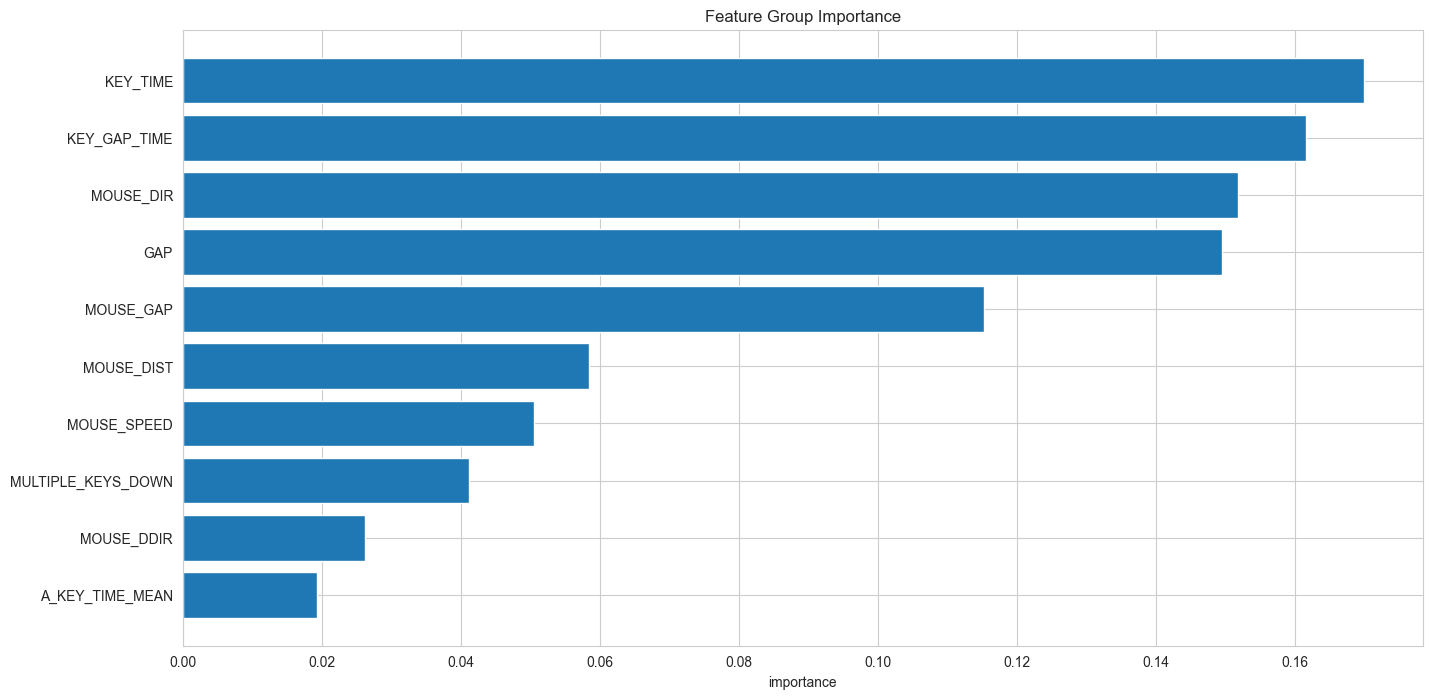

In [29]:
fgi = pd.DataFrame({'name': feature_group_importance[:,0], 'importance': feature_group_importance[:,1].astype(float)})
fgi.sort_values('importance', inplace=True)

n = 10
plt.figure(figsize=(16, 8))
plt.barh(fgi.name[-n:], fgi.importance[-n:])

plt.xlabel('importance')
plt.title('Feature Group Importance')
plt.show()

In [53]:
feature_group_count = 1

feature_set = np.array([feature for group in feature_group_importance[[2], 0] for feature in feature_groups_map[group]])

model = RandomForestClassifier(random_state=0)

model.fit(x_train.iloc[:, feature_set], y_train)
print(accuracy_score(y_test, model.predict(x_test.iloc[:, feature_set])))

0.9911686782455107


In [52]:
feature_set

array([36, 37, 38, 39, 40, 41, 42, 43, 44, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 45, 46, 47, 48, 49, 50, 51, 52, 53], dtype=int64)

## Feature selection from arbitrary model

In [19]:

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

models = [
    RandomForestClassifier(random_state=0),
    # GradientBoostingClassifier(),
    # MLPClassifier(),
    # KNeighborsClassifier(n_neighbors=3, weights='distance'),
    # LinearDiscriminantAnalysis()
]

selectors = [SelectFromModel(estimator=model) for model in models]

x = df.iloc[:, 4:]
y = df.iloc[:, 0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

for model in tqdm(selectors):
    model.fit(x_train, y_train)

100%|██████████| 4/4 [00:18<00:00,  4.59s/it]


In [21]:
import numpy as np

np.sum([s.get_support() for s in selectors])

ValueError: when `importance_getter=='auto'`, the underlying estimator MLPClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [45]:
selectors[3].get_support()

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])